# Comparative Analysis

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

## Load Data

In [2]:
# base learners
dtc_df = pd.read_csv("./results/dtc.csv")
svc_df = pd.read_csv("./results/svc.csv")
lra_df = pd.read_csv("./results/lra.csv")
ann_df = pd.read_csv("./results/ann.csv")

# boosting
boost_dtc_df = pd.read_csv("./results/boost_dtc.csv")
boost_svc_df = pd.read_csv("./results/boost_svc.csv")
boost_lra_df = pd.read_csv("./results/boost_lra.csv")
boost_ann_df = pd.read_csv("./results/boost_ann.csv")

# bagging
bag_dtc_df = pd.read_csv("./results/bag_dtc.csv")
bag_svc_df = pd.read_csv("./results/bag_svc.csv")
bag_lra_df = pd.read_csv("./results/bag_lra.csv")
bag_ann_df = pd.read_csv("./results/bag_ann.csv")

# stacking
stk_df = pd.read_csv('./results/stk.csv')
stk_cv_df = pd.read_csv('./results/stk_cv.csv')

In [3]:
def create_df(dfs_dict, metric):
    """Create dataframe with only `metric` columns."""
    col_dict = {}
    for label, df in dfs_dict.items():
        col_dict[label] = df[metric]
    return pd.DataFrame(col_dict)

In [4]:
def pd_boxplot(df, metric, title, save=False):
    """Plot boxplot of the dataframe."""
    df.boxplot(figsize=(6 + int(len(df.columns)/2), 8), rot=45)
    plt.title(title, fontsize=16)
    plt.ylabel(metric, fontsize=12)
    if save: 
        plt.savefig(f'figures/{title}.png')
    plt.show()

In [5]:
def plot_BCA_mAUC(dfs_dict, title, save=False):
    """Plot routine for BCA and mAUC."""
    BCA_df = create_df(dfs_dict, 'BCA_test')
    mAUC_df = create_df(dfs_dict, 'mAUC_test')
    pd_boxplot(BCA_df, 'BCA', f'{title} (BCA)', save=save)
    pd_boxplot(mAUC_df, 'mAUC', f'{title} (mAUC)', save=save)

In [8]:
def t_test(df1, df2, title):
    t = stats.ttest_ind(df1, df2, equal_var = False)
    print(title, ":\n")
    print("Mean difference: \n", df1.mean()-df2.mean())
    print("========T-test Report========")
    for i, col in enumerate(df1.columns, start=0): 
        print(col + "\t-", "Independent: ", t[1][i]<0.05, "with p =", t[1][i])
    print("")

## Base Learners

In [9]:
base_dict = {
    'DTC': dtc_df,
    'SVC': svc_df,
    'LRA': lra_df,
    'ANN': ann_df,
}

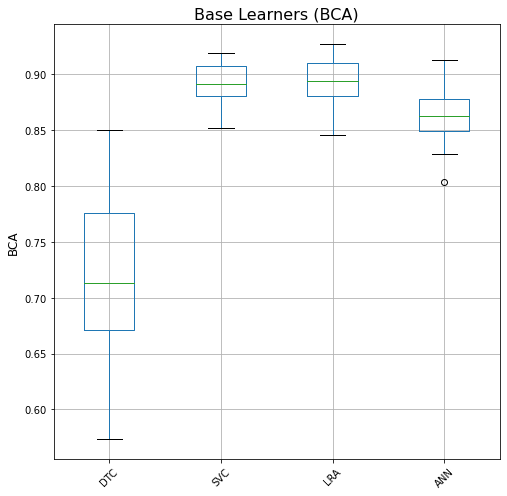

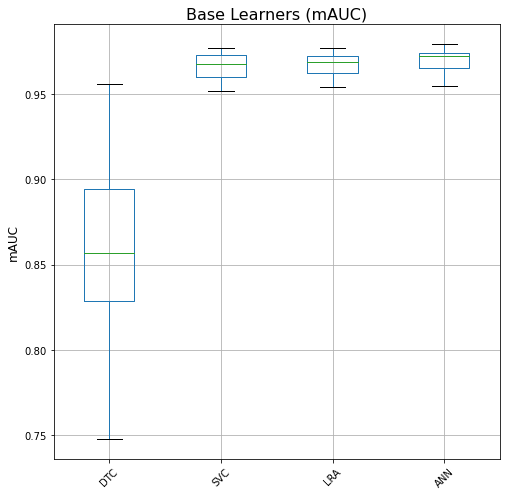

In [10]:
plot_BCA_mAUC(base_dict, 'Base Learners')

## Bagging

In [11]:
bag_dict = {
    'DTC': bag_dtc_df,
    'SVC': bag_svc_df,
    'LRA': bag_lra_df,
    'ANN': bag_ann_df,
}

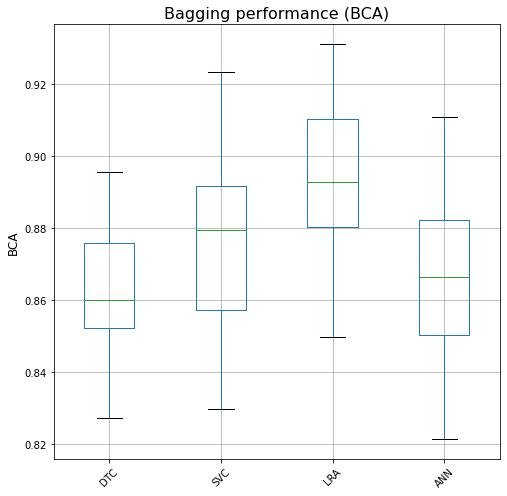

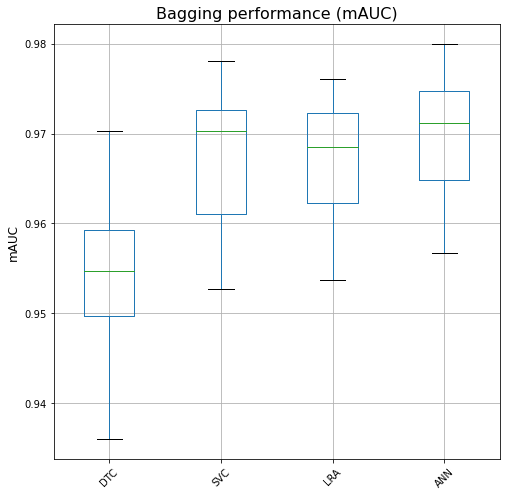

In [12]:
plot_BCA_mAUC(bag_dict, 'Bagging performance')

## Base Learners vs Bagging

In [13]:
base_bag_dict = {
    'DTC': dtc_df,
    'Bagging(DTC)': bag_dtc_df,
    'SVC': svc_df,
    'Bagging(SVC)': bag_svc_df,
    'LRA': lra_df,
    'Bagging(LRA)': bag_lra_df,
    'ANN': ann_df,
    'Bagging(ANN)': bag_ann_df
}

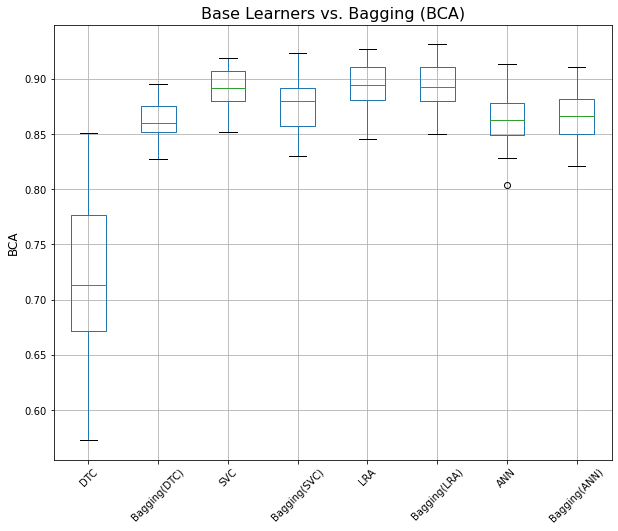

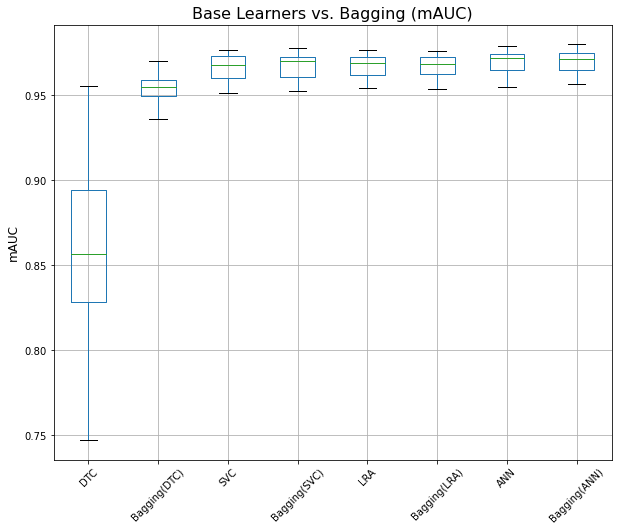

In [14]:
plot_BCA_mAUC(base_bag_dict, 'Base Learners vs. Bagging')

## Base Learners vs Stacking

In [15]:
base_stk_dict = {
    'DTC': dtc_df,
    'SVC': svc_df,
    'LRA': lra_df,
    'ANN': ann_df,
    'Stacking': stk_df,
    'Stacking (CV)': stk_cv_df
}

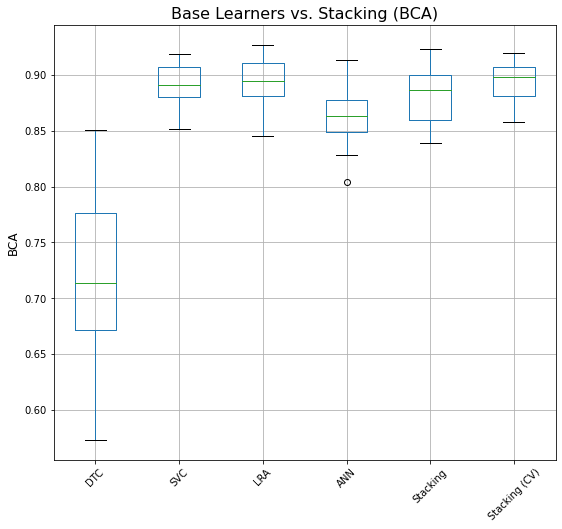

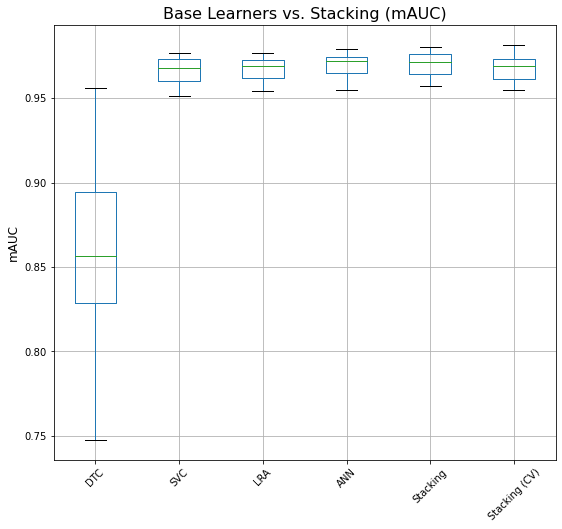

In [16]:
plot_BCA_mAUC(base_stk_dict, 'Base Learners vs. Stacking')

## Base Learners vs Boosting

In [17]:
base_boost_dict = {
    'DTC': dtc_df,
    'Boosting(DTC)': boost_dtc_df,
    'SVC': svc_df,
    'Boosting(SVC)': boost_svc_df,
    'LRA': lra_df,
    'Boosting(LRA)': boost_lra_df,
    'ANN': ann_df,
    'Boosting(ANN)': boost_ann_df
}

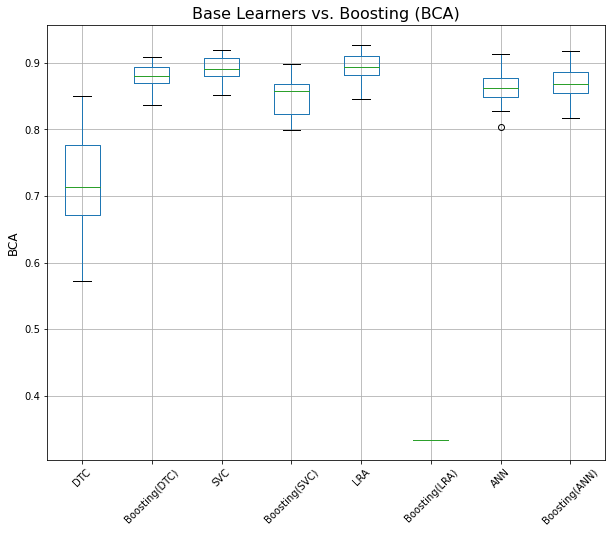

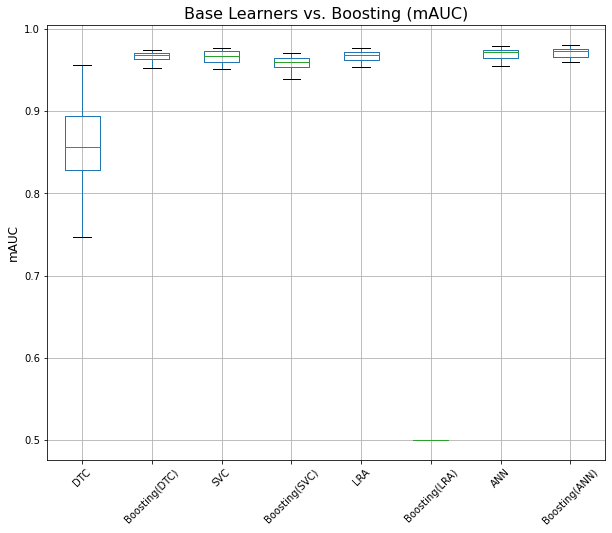

In [18]:
plot_BCA_mAUC(base_boost_dict, 'Base Learners vs. Boosting')

## Bagging vs Stacking vs Boosting

In [19]:
stk_bag_boost_dict = {
    'Bagging(DTC)': bag_dtc_df,
    'Bagging(SVC)': bag_svc_df,
    'Bagging(LRA)': bag_lra_df,
    'Bagging(ANN)': bag_ann_df,
    'Stacking': stk_df,
    'Stacking (CV)': stk_cv_df,
    'Boosting(DTC)': boost_dtc_df,
    'Boosting(SVC)': boost_svc_df,
    'Boosting(LRA)': boost_lra_df,
    'Boosting(ANN)': boost_ann_df
}

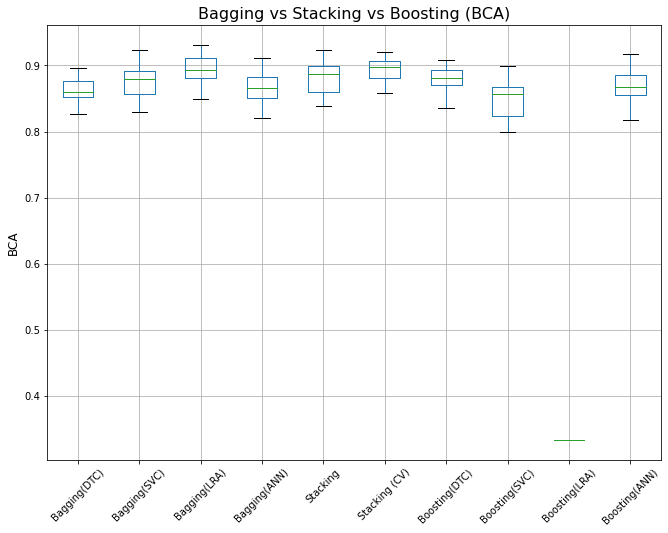

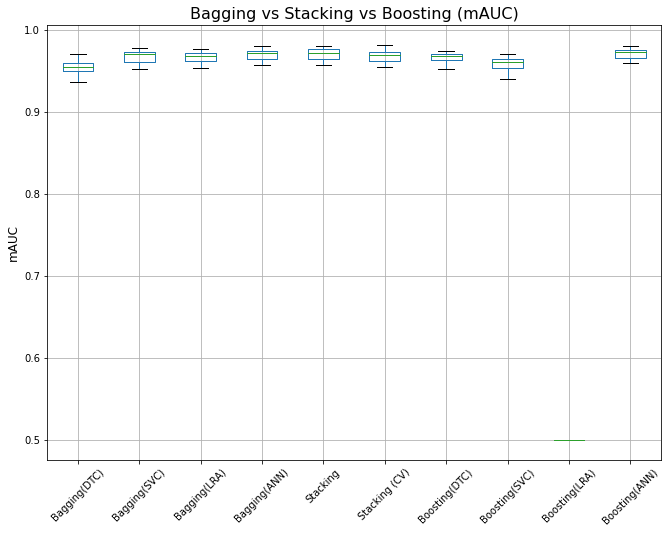

In [20]:
plot_BCA_mAUC(stk_bag_boost_dict, 'Bagging vs Stacking vs Boosting')

## Base learners vs Ensemble methods

In [21]:
all_dict = {
    'DTC': dtc_df,
    'SVC': svc_df,
    'LRA': lra_df,
    'ANN': ann_df,
    'Bagging(DTC)': bag_dtc_df,
    'Bagging(SVC)': bag_svc_df,
    'Bagging(LRA)': bag_lra_df,
    'Bagging(ANN)': bag_ann_df,    
    'Boosting(DTC)': boost_dtc_df,
    'Boosting(SVC)': boost_svc_df,
    'Boosting(LRA)': boost_lra_df,
    'Boosting(ANN)': boost_ann_df,
    'Stacking': stk_df,
    'Stacking (CV)': stk_cv_df,
}

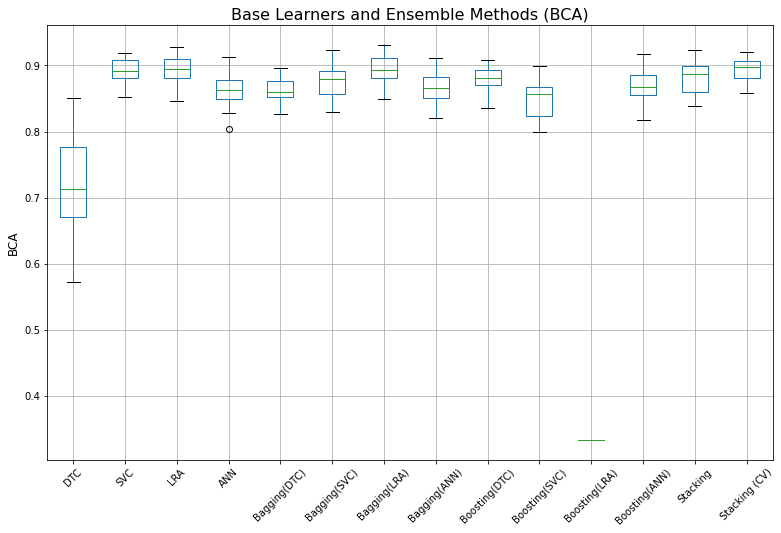

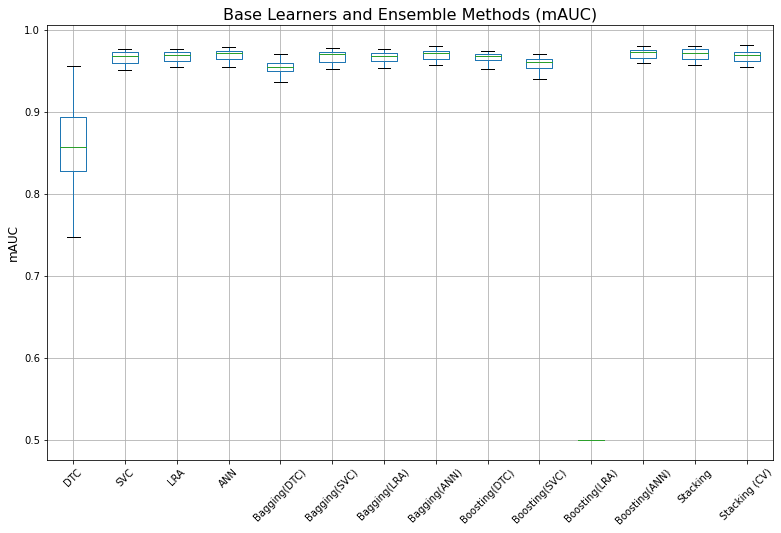

In [22]:
plot_BCA_mAUC(all_dict, 'Base Learners and Ensemble Methods')

## Independent t-tests - Stacking

In [23]:
# Stacking vs Base Learner Decision Tree
t = t_test(stk_cv_df, dtc_df, "Stacking vs Decision Tree")

# Stacking vs Base Learner LRA
t = t_test(stk_cv_df, lra_df, "Stacking vs LRA")

# Stacking vs Base Learner MLP
t = t_test(stk_cv_df, ann_df, "Stacking vs MLP")

# Stacking vs Base Learner SVC
t = t_test(stk_cv_df, svc_df, "Stacking vs SVC")

Stacking vs Decision Tree :

Mean difference: 
 BCA_train     0.178300
BCA_test      0.171168
mAUC_train    0.113562
mAUC_test     0.108184
dtype: float64
========T-test Report========
BCA_train	- Independent:  True with p = 7.703778418739106e-14
BCA_test	- Independent:  True with p = 1.8533168145525627e-13
mAUC_train	- Independent:  True with p = 3.210182258919018e-14
mAUC_test	- Independent:  True with p = 2.383070052054512e-13

Stacking vs LRA :

Mean difference: 
 BCA_train     0.024618
BCA_test      0.001947
mAUC_train    0.018715
mAUC_test     0.000107
dtype: float64
========T-test Report========
BCA_train	- Independent:  True with p = 1.0447968982471183e-16
BCA_test	- Independent:  False with p = 0.6943463333266222
mAUC_train	- Independent:  True with p = 5.726292514548833e-17
mAUC_test	- Independent:  False with p = 0.9527365170048339

Stacking vs MLP :

Mean difference: 
 BCA_train     0.031066
BCA_test      0.031098
mAUC_train    0.008078
mAUC_test    -0.001688
dtype: float64

## Independent t-tests - Bagging

In [24]:
# Bagging vs Base Learner Decision Tree
t = t_test(bag_dtc_df, dtc_df, "Bagging vs Decision Tree")

# Bagging vs Base Learner LRA
t = t_test(bag_lra_df, lra_df, "Bagging vs LRA")

# Bagging vs Base Learner MLP
t = t_test(bag_ann_df, ann_df, "Bagging vs MLP")

# Bagging vs Base Learner SVC
t = t_test(bag_svc_df, svc_df, "Bagging vs SVC")

Bagging vs Decision Tree :

Mean difference: 
 BCA_train     0.124562
BCA_test      0.137567
mAUC_train    0.085078
mAUC_test     0.093808
dtype: float64
========T-test Report========
BCA_train	- Independent:  True with p = 4.521893431649937e-10
BCA_test	- Independent:  True with p = 4.2219413490359344e-11
mAUC_train	- Independent:  True with p = 4.686917222284034e-11
mAUC_test	- Independent:  True with p = 7.459226068295744e-12

Bagging vs LRA :

Mean difference: 
 BCA_train    -0.000092
BCA_test     -0.000155
mAUC_train   -0.000341
mAUC_test    -0.000222
dtype: float64
========T-test Report========
BCA_train	- Independent:  False with p = 0.9417988652599188
BCA_test	- Independent:  False with p = 0.9772675481325758
mAUC_train	- Independent:  False with p = 0.4099379369554146
mAUC_test	- Independent:  False with p = 0.8972365659342084

Bagging vs MLP :

Mean difference: 
 BCA_train     0.008433
BCA_test      0.002242
mAUC_train    0.002593
mAUC_test     0.000229
dtype: float64
=======

## Independent t-tests - Boosting

In [25]:
# Boosting vs Base Learner Decision Tree
t = t_test(boost_dtc_df, dtc_df, "Boosting vs Decision Tree")

# Boosting vs Base Learner LRA
t = t_test(boost_lra_df, lra_df, "Boosting vs LRA")

# Boosting vs Base Learner MLP
t = t_test(boost_ann_df, ann_df, "Boosting vs MLP")

# Boosting vs Base Learner SVC
t = t_test(boost_svc_df, svc_df, "Boosting vs SVC")

Boosting vs Decision Tree :

Mean difference: 
 BCA_train     0.148396
BCA_test      0.155826
mAUC_train    0.100983
mAUC_test     0.106647
dtype: float64
========T-test Report========
BCA_train	- Independent:  True with p = 8.143666522750172e-12
BCA_test	- Independent:  True with p = 1.7584312352108446e-12
mAUC_train	- Independent:  True with p = 8.328173434217188e-13
mAUC_test	- Independent:  True with p = 3.9458664281035e-13

Boosting vs LRA :

Mean difference: 
 BCA_train    -0.562032
BCA_test     -0.560007
mAUC_train   -0.467546
mAUC_test    -0.467657
dtype: float64
========T-test Report========
BCA_train	- Independent:  True with p = 4.206536725379359e-62
BCA_test	- Independent:  True with p = 7.301880592178856e-43
mAUC_train	- Independent:  True with p = 1.29503450960415e-73
mAUC_test	- Independent:  True with p = 2.2149927088449107e-55

Boosting vs MLP :

Mean difference: 
 BCA_train     0.011095
BCA_test      0.005813
mAUC_train    0.003840
mAUC_test     0.001161
dtype: float6

In [26]:
# Boosting vs Bagging - DTC
t = t_test(boost_dtc_df, bag_dtc_df, "Boosting (DTC) vs Bagging (DTC)")

# Boosting vs Bagging - LRA
t = t_test(boost_lra_df, bag_lra_df, "Boosting (LRA) vs Bagging (LRA)")

# Boosting vs Bagging - SVC
t = t_test(boost_svc_df, bag_svc_df, "Boosting (SVC) vs Bagging (SVC)")

# Boosting vs Bagging - ANN
t = t_test(boost_ann_df, bag_ann_df, "Boosting (ANN) vs Bagging (ANN)")

# Stacking vs Bagging - DTC
t = t_test(stk_cv_df, bag_dtc_df, "Stacking vs Bagging (DTC)")

# Stacking vs Bagging - LRA
t = t_test(stk_cv_df, bag_lra_df, "Stacking vs Bagging (LRA)")

# Stacking vs Bagging - SVC
t = t_test(stk_cv_df, bag_svc_df, "Stacking vs Bagging (SVC)")

# Stacking vs Bagging - ANN
t = t_test(stk_cv_df, bag_ann_df, "Stacking vs Bagging (ANN)")

# Boosting vs Stacking - DTC
t = t_test(boost_dtc_df, stk_cv_df, "Boosting (DTC) vs Stacking")

# Boosting vs Stacking - LRA
t = t_test(boost_lra_df, stk_cv_df, "Boosting (LRA) vs Stacking")

# Boosting vs Stacking - SVC
t = t_test(boost_svc_df, stk_cv_df, "Boosting (SVC) vs Stacking")

# Boosting vs Stacking - ANN
t = t_test(boost_ann_df, stk_cv_df, "Boosting (ANN) vs Stacking")

Boosting (DTC) vs Bagging (DTC) :

Mean difference: 
 BCA_train     0.023834
BCA_test      0.018260
mAUC_train    0.015904
mAUC_test     0.012839
dtype: float64
========T-test Report========
BCA_train	- Independent:  True with p = 4.194425817289602e-24
BCA_test	- Independent:  True with p = 0.0003405458993419454
mAUC_train	- Independent:  True with p = 8.453270190074697e-32
mAUC_test	- Independent:  True with p = 1.0334554314484793e-08

Boosting (LRA) vs Bagging (LRA) :

Mean difference: 
 BCA_train    -0.561941
BCA_test     -0.559853
mAUC_train   -0.467204
mAUC_test    -0.467435
dtype: float64
========T-test Report========
BCA_train	- Independent:  True with p = 3.213590631137019e-61
BCA_test	- Independent:  True with p = 1.6074652180727214e-43
mAUC_train	- Independent:  True with p = 4.7019983573990765e-73
mAUC_test	- Independent:  True with p = 2.1575593213308678e-55

Boosting (SVC) vs Bagging (SVC) :

Mean difference: 
 BCA_train    -0.029875
BCA_test     -0.027375
mAUC_train   -0.